In [68]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

In [3]:
print(f"Numpy version:   {np.__version__}")
print(f"Pandas version:  {pd.__version__}")
print(f"Sklearn version: {sklearn.__version__}")

Numpy version:   1.23.4
Pandas version:  1.5.1
Sklearn version: 1.1.2


## Data Cleaning, Processing and Exploration

In [4]:
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False)

In [5]:
df.head(3)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
saledate                     object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                

In [7]:
df.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [8]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

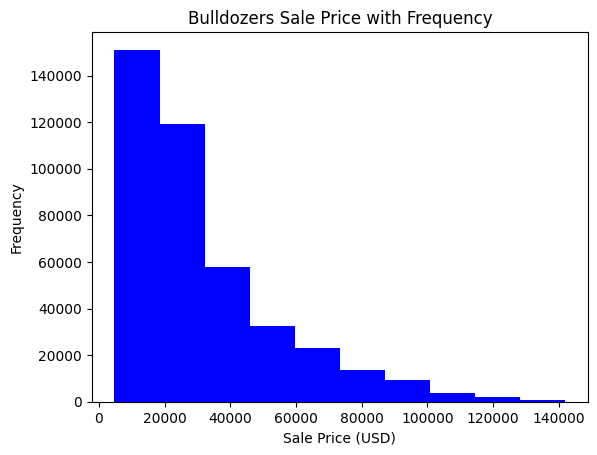

In [9]:
# Bulldozers sale price frequency 
plt.hist(df.SalePrice,
         color='blue')

plt.title("Bulldozers Sale Price with Frequency")
plt.xlabel("Sale Price (USD)")
plt.ylabel("Frequency");

### Parsing Dates

In [10]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [11]:
df.saledate.dtype

dtype('O')

> Importing data again with parse_dates parameter 

In [12]:
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False,
                 parse_dates=["saledate"])

In [13]:
df.saledate.dtype

dtype('<M8[ns]')

In [14]:
df.saledate[:5]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

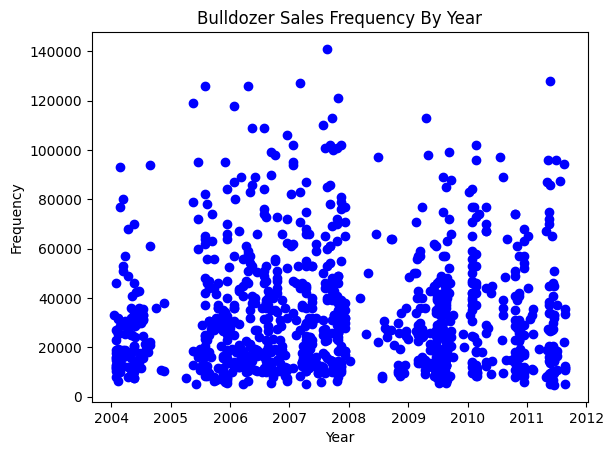

In [15]:
# Bulldozers sale frequency by year
fig, ax = plt.subplots()

ax.scatter(x=df.saledate[:1000],
           y=df.SalePrice[:1000],
           color='blue')

ax.set(title='Bulldozer Sales Frequency By Year',
       xlabel='Year',
       ylabel='Frequency');

In [16]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [17]:
# sort dataframe by saledate
df.sort_values(by=["saledate"],
               inplace=True,
               ascending=True)

In [18]:
df.saledate.head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [19]:
# Copy of a dataframe
df_copy = df.copy()

In [20]:
df_copy["saleYear"] = df_copy.saledate.dt.year
df_copy["saleMonth"] = df_copy.saledate.dt.month
df_copy["saleDay"] = df_copy.saledate.dt.day
df_copy["saleDayOfWeek"] = df_copy.saledate.dt.dayofweek
df_copy["saleDayOfYear"] = df_copy.saledate.dt.dayofyear

In [21]:
df_copy.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls', 'saleYear',
       'saleMonth', 'saleDay', 'saleDayOfWeek', 'saleDayOfYear'],

In [22]:
print(f"{len(df.columns)}")
print(f"{len(df_copy.columns)}")

53
58


In [23]:
# Drop saledate column
df_copy.drop("saledate",
             axis=1,
             inplace=True)

In [24]:
# Function to find unique values
def print_unique_obj_values(df):
    """
    Return column names with unique object values.
    
    Parameter:
    df : Data frame
    """
    for col in df:
        if df[col].dtypes == "object":
            print(f'{col}: {df[col].unique()}\n') 

In [25]:
print_unique_obj_values(df_copy)

UsageBand: [nan 'Low' 'Medium' 'High']

fiModelDesc: ['TD20' 'A66' 'D7G' ... 'EX550BH' 'GD650AW-2C' '710VHP']

fiBaseModel: ['TD20' 'A66' 'D7' ... 'ROBOT 165' '1CX' 'WLK15']

fiSecondaryDesc: [nan 'G' 'B' 'C' 'H' 'F' 'D' 'E' 'M' 'K' 'Z' 'A' 'L' 'N' 'P' 'WD' 'S' 'CK'
 'CE' 'LC' 'U' 'CL' 'SX' 'CKB' 'BEC' 'UU' 'EX' 'ZF' 'SUPER L' 'URG' 'SE'
 'HDSL' 'PX' 'DC' 'W' 'SU' 'T' 'TX' 'LCM' 'HD' 'AG' 'LS' 'UR' 'AX' 'R'
 'SL' 'ESS' 'J' 'LE' 'PL' 'JX' 'XT' 'LCH' 'BL' '3' 'SR' 'SUPER K' 'US' 'V'
 'TM' 'DZ' 'EL' 'SRLC' 'ZTS' 'DX' 'USR' 'SUPER E' 'MR' 'XL' 'SG' 'SP' 'SB'
 'MU' 'CR' 'NX' 'CM' 'SUPER M' 'FR' 'CH' 'ZX' 'SXT' 'AW' 'NE' 'Q' 'MRX'
 'TTL' 'SUPER LE' 'LR' 'HF' 'GT' 'DXT' '0.7' 'HDS' 'PT' '5' '7' 'NL' 'CS'
 'ZHS' 'EW' 'R-2' 'LX' 'DT' 'ZT' 'STD' 'AA' '-7' 'SRDZ' 'HL' '1' 'LGP'
 'LT' 'ZTM' 'SUPER' 'H90' 'IV' 'B     ' 'XLT' 'MXT' 'USRK' 'TP' '-3' 'MT'
 'BZ' 'BLGP' 'PG' 'WT' 'HLGP' 'BZD' 'BLGPPS' 'SUPER M PLUS' 'WX' 'PS'
 'MSR SPIN ACE' '2' 'TC' 'LCD' 'XP' 'PTC' 'THF' 'HZ' '-2' 'ZHS G'
 ' MSR SPIN 

In [26]:
# Count diff state values
df_copy.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## Feature Encoding

In [27]:
df_copy.head(3)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31


### Convert string objects to categories with pandas 

In [28]:
# Check string datatype
pd.api.types.is_string_dtype(df_copy.UsageBand)

True

In [29]:
# Function to find columns with string datatype
def get_string_dtypes(df):
    """
    Return column names array with string datatypes.
    
    Parameter:
    df : Data frame
    """
    cols = []
    for col_name, val in df.items():
        if pd.api.types.is_string_dtype(val):
            cols.append(col_name)
    return cols


# Function to convert string values to categories
def string_to_cat(df):
    """
    Convert columns with string datatypes into categories.
    
    Parameter:
    df : Data frame
    """
    for col_name, val in df.items():
        if pd.api.types.is_string_dtype(val):
            df[col_name] = val.astype("category").cat.as_ordered()

In [30]:
get_string_dtypes(df_copy)

['UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

In [31]:
df_copy.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                 object
Blade_Extension             

In [32]:
# String dtype ==> Category 
string_to_cat(df_copy)
df_copy.dtypes

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
UsageBand                   category
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
fiModelSeries               category
fiModelDescriptor           category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Drive_System                category
Enclosure                   category
Forks                       category
Pad_Type                    category
Ride_Control                category
Stick                       category
Transmission                category
Turbocharged                category
B

In [33]:
# Print example categories
df_copy.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [34]:
df_copy.ProductSize.cat.categories

Index(['Compact', 'Large', 'Large / Medium', 'Medium', 'Mini', 'Small'], dtype='object')

In [35]:
# Encoded category datatype values
print(df_copy.state.cat.categories.unique())
print(df_copy.state.cat.codes.unique())

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')
[43  8  9 40 35 37  2 48 27 29  5  4 13 19 45 30 52 31 12 24  6 16 17 42
 22 25 33 36 15  0 18 34 47  7 28 23 14 51 32 46  1 11 26  3 39 41 44 38
 50 20 21 10 49]


In [36]:
# Save preprocessed data
# Export current copy of dataframe
df_copy.to_csv(path_or_buf='data/bluebook-for-bulldozers/train-preprocessed.csv',
               index=False)

In [37]:
# Import preprocessed data
df_copy = pd.read_csv('data/bluebook-for-bulldozers/train-preprocessed.csv',
                      low_memory=False)

df_copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [38]:
# Missing values
df_copy.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Fill missing values

#### Fill numerical missing values

In [39]:
# Find numeric columns
def get_numeric_dtypes(df):
    """
    Returns column names array with numeric datatype
    
    Parameter:
    df : Data frame
    """
    cols = []
    for col_name, val in df.items():
        if pd.api.types.is_numeric_dtype(val):
            cols.append(col_name)
    return cols


# Find numeric columns with null values
def find_null_num_col(df):
    """
    Returns column names with numeric datatypes which has null values.
    
    Parameter:
    df : Data frame
    """
    null_cols = []
    for col_name, val in df.items():
        if pd.api.types.is_numeric_dtype(val):
            if pd.isnull(val).sum():
                null_cols.append(col_name)
    return null_cols

In [40]:
get_numeric_dtypes(df_copy)

['SalesID',
 'SalePrice',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'saleYear',
 'saleMonth',
 'saleDay',
 'saleDayOfWeek',
 'saleDayOfYear']

In [41]:
find_null_num_col(df_copy)

['auctioneerID', 'MachineHoursCurrentMeter']

In [42]:
# Fill numeric columns with median
for col_name, val in df_copy.items():
    if get_numeric_dtypes(df_copy):
        if find_null_num_col(df_copy):
            # Add binary column which tells us if data was missing
            df_copy[col_name + '_is_missing'] = pd.isnull(val)
            # Fill missing values with median
            df_copy[col_name] = val.fillna(val.median())

In [43]:
df_copy.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [44]:
df_copy.isnull().sum()

SalesID                                0
SalePrice                              0
MachineID                              0
ModelID                                0
datasource                             0
                                      ..
ModelID_is_missing                     0
datasource_is_missing                  0
auctioneerID_is_missing                0
YearMade_is_missing                    0
MachineHoursCurrentMeter_is_missing    0
Length: 65, dtype: int64

In [45]:
find_null_num_col(df_copy)

[]

#### Fill categorical missing values

In [46]:
# Find non-numeric columns
def get_non_numeric_cols(df):
    """
    Returns column names with no-numerical datatypes.
    
    Parameter:
    df : Data frame
    """
    non_numeric_cols = [] 
    for col_name, val in df.items():     
        if not pd.api.types.is_numeric_dtype(val):
            non_numeric_cols.append(col_name)
    return non_numeric_cols

In [47]:
get_non_numeric_cols(df_copy)

['UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

In [48]:
print(pd.Categorical(df_copy["state"]), '\n')
print(pd.Categorical(df_copy["state"]).codes)

['Texas', 'Florida', 'Florida', 'Florida', 'Florida', ..., 'California', 'California', 'California', 'California', 'California']
Length: 412698
Categories (53, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington DC', 'West Virginia', 'Wisconsin', 'Wyoming'] 

[43  8  8 ...  4  4  4]


In [67]:
# Turn categorical variables into numbers and fill missing values 
for col_name, val in df_copy.items():
    if not pd.api.types.is_numeric_dtype(val):
        # Add binary column to indicate missing values
        df_copy[col_name + "_is_missing"] = pd.isnull(val)
        # Turn categories into numbers and add +1
        df_copy[col_name] = pd.Categorical(val).codes + 1   # we don't want values to be (-ve) so we have all (+ve) values

In [50]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 109 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(52), float64(3), int16(4), int64(10), int8(40)
memory usage: 80.3 MB


In [51]:
df_copy.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [52]:
df_copy.isnull().sum()[:25]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
dtype: int64

In [53]:
df_copy.head(3)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True


In [54]:
len(df_copy)

412698

## Modeling

In [55]:
X = df_copy.drop("SalePrice", axis=1)
y = df_copy["SalePrice"]

### Split Data
* `The training set`, contains data through the end of 2011.
* `The validation set`, contains data from January 1, 2012 - April 30, 2012.

In [56]:
# Split dataframe according to timeline
df_valid = df_copy[df_copy.saleYear == 2012]
df_train = df_copy[df_copy.saleYear != 2012]

len(df_valid), len(df_train)

(11573, 401125)

In [57]:
# Split data into train and validation
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
X_valid, y_valid = df_valid.drop("SalePrice", axis=1), df_valid["SalePrice"]

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 108), (401125,), (11573, 108), (11573,))

In [58]:
# Evaluation function of RMSLE
def rmsle(y_test, y_pred):
    """
    Calculats root mean squared logirithmic error between predicitions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_pred))


# Function to evaluate model on few different levels
def show_model_scores(model):
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    
    scores = {
        "Train MAE": mean_absolute_error(y_train, train_preds),
        "Valid MAE": mean_absolute_error(y_valid, valid_preds),
        "Train RMSLE": rmsle(y_train, train_preds),
        "Valid RMSLE": rmsle(y_valid, valid_preds),
        "Train R2": r2_score(y_train, train_preds),
        "Valid R2": r2_score(y_valid, valid_preds),
    }
    
    return scores

In [59]:
# Model instance
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

In [60]:
%%time
model.fit(X_train, y_train)

CPU times: user 17min 56s, sys: 7.33 s, total: 18min 3s
Wall time: 2min 30s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [61]:
model.score(X_train, y_train)

0.9875099935063139

## Reduce Training Time and Hyperparameter Tuning Experimentation

In [62]:
len(X_train)

401125

In [63]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

* For model with baseline hyperparameters :
> Model has to look into `(max_samples * n_estimators) = 401125 * 100 = 40112500 rows`

* If we reduce max_sample size for example, 10000  
- we can also change n_estimators, but we are leaving as default (100).  
> Now, model has to look into `(max_samples * n_estimators) = 10000 * 100 = 1000000 rows`


> 40112500 / 1000000 = `40x` less data to compute on, leading to `40x faster`

#### Tuning **`max_samples`** hyperparameter

In [64]:
%%time

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

model.fit(X_train, y_train)

CPU times: user 36.6 s, sys: 377 ms, total: 37 s
Wall time: 5.27 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [65]:
show_model_scores(model)

{'Train MAE': 5563.935402455593,
 'Valid MAE': 7181.969849650047,
 'Train RMSLE': 0.25791513208155403,
 'Valid RMSLE': 0.29325473529190893,
 'Train R2': 0.8605913554399697,
 'Valid R2': 0.8315890088476047}

In [66]:
len(X_train)

401125

In [69]:
%%time

# RandomForestRegressor hyperparameters grid
rf_grid = {
    "n_estimators": np.arange(10, 100, 10),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [0.5, 1, "sqrt"],
    "max_samples": [10000]
}

# RandomizedSearchCV model
rs_model = RandomizedSearchCV(estimator=RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=3,      
                              n_jobs=-1,
                              random_state=42,
                              verbose=True)

# Fit model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
CPU times: user 829 ms, sys: 318 ms, total: 1.15 s
Wall time: 18.1 s


RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=3, n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=42, verbose=True)

In [70]:
# Best hyperpameters for our model
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 1,
 'max_depth': None}

In [71]:
# Evaluate RandomizedSearchCV model
show_model_scores(rs_model)

{'Train MAE': 8844.136333233038,
 'Valid MAE': 11378.169989171287,
 'Train RMSLE': 0.39082424141160454,
 'Valid RMSLE': 0.4526461852994868,
 'Train R2': 0.6860358543970502,
 'Valid R2': 0.6376989698655084}

### Train model with best hyperparameters so far...

%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)

# Fit the ideal model
ideal_model.fit(X_train, y_train)

In [73]:
# Scores on rs_model (only trained on ~10,000 samples)
show_model_scores(rs_model)

{'Train MAE': 8844.136333233038,
 'Valid MAE': 11378.169989171287,
 'Train RMSLE': 0.39082424141160454,
 'Valid RMSLE': 0.4526461852994868,
 'Train R2': 0.6860358543970502,
 'Valid R2': 0.6376989698655084}

In [74]:
# Scores on ideal_model (trained on all ~401,125 samples)
show_model_scores(ideal_model)

{'Train MAE': 2956.2486522989384,
 'Valid MAE': 5954.753891165063,
 'Train RMSLE': 0.14455495863328413,
 'Valid RMSLE': 0.24623196126167265,
 'Train R2': 0.9587664825950853,
 'Valid R2': 0.881359559199072}

## Make Predictions

> We have our RandomForestRegressor ideal model with the `RMSLE = 0.245` we can now use our model to make predicitions on test data.

In [75]:
# Import the test data
test_df = pd.read_csv(filepath_or_buffer='data/bluebook-for-bulldozers/Test.csv',
                      low_memory=False,
                      parse_dates=["saledate"])
test_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [76]:
test_df.isnull().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [78]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [82]:
print(f"Testing data columns: {len(test_df.columns)}")
print(f"Training data columns: {len(X_train.columns)}")

Testing data columns: 52
Training data columns: 108


### Data Processing Pipeline

In [83]:
# Function to preprocess data
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with median
    for key, val in df.items():     
        if pd.api.types.is_numeric_dtype(val):
            if pd.isnull(val).sum():
                df[key + '_is_missing'] = pd.isnull(val)
                df[key] = val.fillna(val.median())

        # Fill categorical missing data and convert into numbers
        if not pd.api.types.is_numeric_dtype(val):
            df[key + "_is_missing"] = pd.isnull(val)
            df[key] = pd.Categorical(val).codes + 1
    
    return df

In [84]:
test_df = preprocess_data(test_df)
test_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [85]:
print(len(X_train.columns))
print(len(test_df.columns))

108
101


In [89]:
# Finding out which columns are missing
diff = set(X_train.columns) - set(test_df.columns)
diff

{'MachineID_is_missing',
 'ModelID_is_missing',
 'SalePrice_is_missing',
 'SalesID_is_missing',
 'YearMade_is_missing',
 'datasource_is_missing'}

In [91]:
# Manually adjust test_df to have auctioneerID_is_missing column
for col in diff:  
    test_df[col] = False      # because is has no missing values
    
len(test_df.columns)

108

In [96]:
# Make predictions on test data using ideal_model
test_preds = ideal_model.predict(test_df)
len(test_df)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


12457

In [97]:
test_preds

array([25283.87881767, 20917.25097545, 40227.74122351, ...,
       13237.07951998, 18489.07271497, 28254.77222112])

In [98]:
df_preds = pd.DataFrame()
df_preds["SalesID"] = test_df["SalesID"]
df_preds["SalesPrice"] = test_preds

df_preds

,SalesID,SalesPrice
0,1227829,25283.878818
1,1227844,20917.250975
2,1227847,40227.741224
3,1227848,53142.676955
4,1227863,49317.529890
...,...,...
12452,6643171,41261.171099
12453,6643173,16169.294045
12454,6643184,13237.079520
12455,6643186,18489.072715


In [99]:
# Export predicitions data
df_preds.to_csv("data/bluebook-for-bulldozers/test_predictions.csv", index=False)

## Feature Importance

In [100]:
# Find feature importance of our best model
len(ideal_model.feature_importances_)

108

In [103]:
# Utility function to plot feature importance
def plot_features(columns, importances, n=20):
    """
    Plot the most important features and return visual representation.
    """
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.barh(y=df["features"][:n], width=df["feature_importances"][:n], color='blue')
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis() 

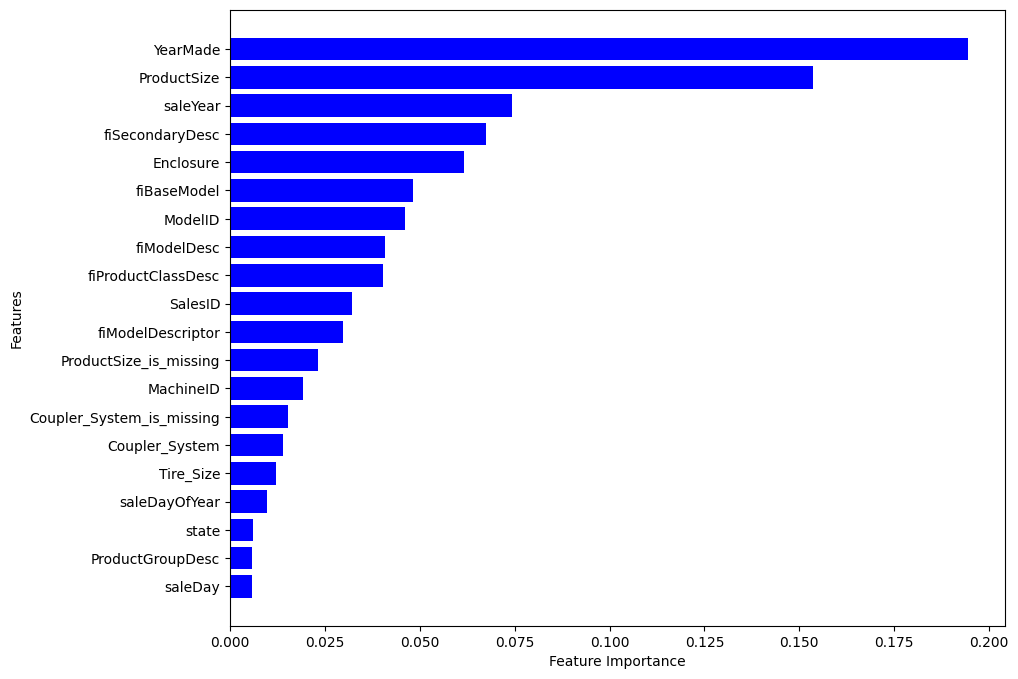

In [104]:
plot_features(columns=X_train.columns,
              importances=ideal_model.feature_importances_);

In [105]:
df["ProductSize"].value_counts()

Medium            64342
Large / Medium    51297
Small             27057
Mini              25721
Large             21396
Compact            6280
Name: ProductSize, dtype: int64

In [106]:
df["Enclosure"].value_counts()

OROPS                  177971
EROPS                  141769
EROPS w AC              92601
EROPS AC                   18
NO ROPS                     3
None or Unspecified         2
Name: Enclosure, dtype: int64